In [2]:
import sys, os
import numpy as np
from scipy.io import wavfile
from scipy import signal
import utility as util

import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

%matplotlib inline

In [3]:
# Specgram Settings
NFFT = 4096/2;
noverlap = NFFT*.5;
cmap = 'viridis'

# Resample Settings
up = 48;
down = 125;
y_fs = 48000;

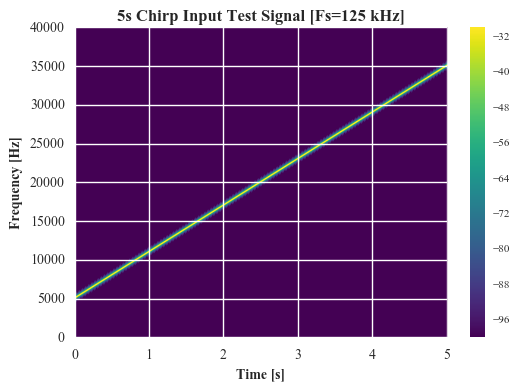

In [4]:
input_file ='/Users/aarontreptow/Desktop/MSReport/data/input/chirp_5s.wav'
fs,x = wavfile.read(input_file)
x = util.pcm2float(x,dtype='float32')

fig = plt.figure()
plt.specgram(x,NFFT=NFFT,noverlap=noverlap,Fs=fs,cmap=cmap);
sns.set_context('paper')
plt.ylim(0,40e3);
plt.title('5s Chirp Input Test Signal [Fs=125 kHz]', fontsize=12, fontweight='bold')
plt.ylabel('Frequency [Hz]', fontsize=10, fontweight='bold')
plt.xlabel('Time [s]', fontsize=10, fontweight='bold')
plt.colorbar();
plt.clim(-100,-30)
plt.savefig('/Users/aarontreptow/Desktop/MSReport/report/Diagrams/Images/5s_chirp.png', format='png', dpi=700)

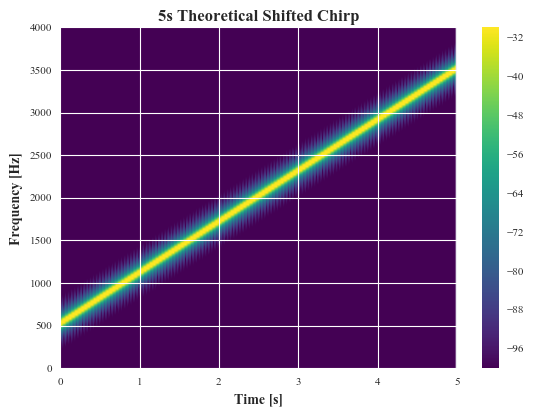

In [9]:
path = '/Users/aarontreptow/Desktop/MSReport/data/chirp_5s/chirp5s_theoretical.wav'

fs,y_theory = wavfile.read(path)
y_theory_resamp = signal.resample_poly(y_theory,up,down)
theoryNorm = util.pcm2float(y_theory_resamp.astype('int32'),dtype='float32')
t_y = np.linspace(0,(y_theory_resamp.size / y_fs), y_theory_resamp.size)

NFFT = 4096/2;
noverlap = NFFT*.75;

plt.figure();
plt.specgram(y_theory_resamp,NFFT=NFFT,noverlap=noverlap,Fs=y_fs,cmap=cmap);
plt.ylim(0,4e3);
plt.title('5s Theoretical Shifted Chirp', fontsize=12, fontweight='bold')
plt.ylabel('Frequency [Hz]', fontsize=10, fontweight='bold')
plt.xlabel('Time [s]', fontsize=10, fontweight='bold')
plt.grid(True)
plt.colorbar();
plt.clim(-100,-30)
plt.savefig('/Users/aarontreptow/Desktop/MSReport/report/Diagrams/Images/5s_chirp_theory.png', format='png', dpi=700)

IPython.display.Audio(data=y_theory_resamp, rate=y_fs)

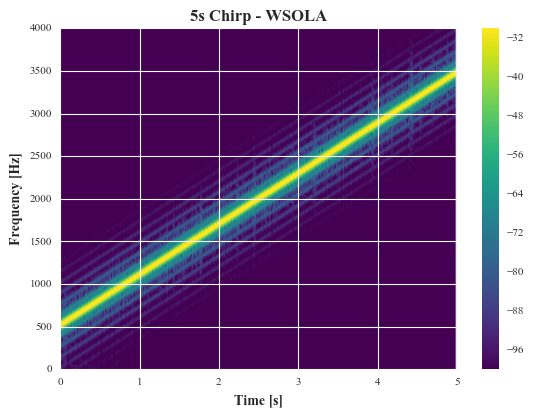

In [10]:
path = '/Users/aarontreptow/Desktop/MSReport/data/chirp_5s/chirp5s_wsola.wav'

fs,y_wsola = wavfile.read(path)
y_wsola_resamp = signal.resample_poly(y_wsola,up,down)
wsolaNorm = util.pcm2float(y_wsola_resamp.astype('int16'),dtype='float32')

plt.figure();
plt.specgram(wsolaNorm,NFFT=NFFT,noverlap=noverlap,Fs=y_fs,cmap=cmap);
plt.ylim(0,4e3);
plt.title('5s Chirp - WSOLA', fontsize=12, fontweight='bold')
plt.ylabel('Frequency [Hz]', fontsize=10, fontweight='bold')
plt.xlabel('Time [s]', fontsize=10, fontweight='bold')
plt.colorbar();
plt.clim(-100,-30)
plt.savefig('/Users/aarontreptow/Desktop/MSReport/report/Diagrams/Images/5s_chirp_wsola.png', format='png', dpi=700)

IPython.display.Audio(data=y_wsola_resamp, rate=y_fs)

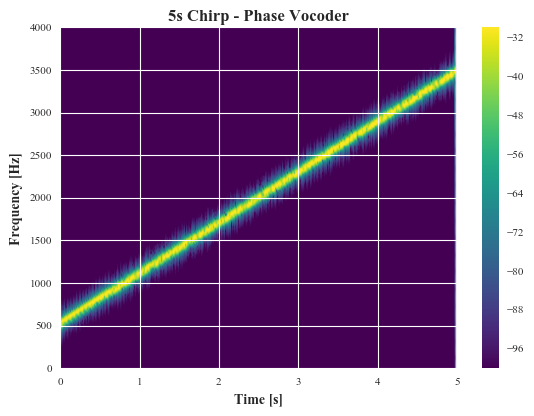

In [11]:
import pv_lib as pv

nSteps = -40*4
bins_per_octave = 48
frameTime = 0.01
n_fft = frameTime*fs

yprime_pv = pv.phase_vocoder(x.astype(np.float32),fs,nSteps,n_fft,bins_per_octave)
y_pv_resamp = signal.resample_poly(yprime_pv,up,down)

plt.figure();
plt.specgram(y_pv_resamp,NFFT=NFFT,noverlap=noverlap,Fs=y_fs,cmap=cmap);
plt.ylim(0,4e3);
plt.title('5s Chirp - Phase Vocoder',fontsize=12, fontweight='bold')
plt.ylabel('Frequency [Hz]', fontsize=10, fontweight='bold')
plt.xlabel('Time [s]', fontsize=10, fontweight='bold')
plt.colorbar();
plt.clim(-100,-30)
plt.savefig('/Users/aarontreptow/Desktop/MSReport/report/Diagrams/Images/5s_chirp_pv.png', format='png', dpi=700)

IPython.display.Audio(data=y_pv_resamp, rate=y_fs)

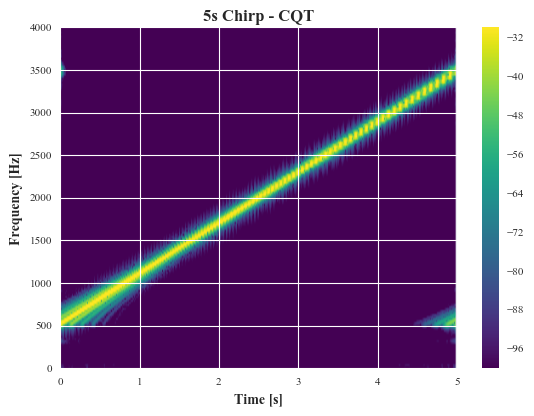

In [12]:
path = '/Users/aarontreptow/Desktop/MSReport/data/chirp_5s/chirp_5s_cqt.wav'

fs,y_cqt = wavfile.read(path)
y_cqt_resamp = signal.resample_poly(y_cqt,up,down)
cqtNorm = y_cqt_resamp/np.max(y_cqt_resamp)

plt.figure();
plt.specgram(cqtNorm,NFFT=NFFT,noverlap=noverlap,Fs=y_fs,cmap=cmap);
plt.ylim(0,4e3);
plt.title('5s Chirp - CQT', fontsize=12, fontweight='bold')
plt.ylabel('Frequency [Hz]', fontsize=10, fontweight='bold')
plt.xlabel('Time [s]', fontsize=10, fontweight='bold')
plt.colorbar();
plt.clim(-100,-30)
plt.savefig('/Users/aarontreptow/Desktop/MSReport/report/Diagrams/Images/5s_chirp_CQT.png', format='png', dpi=700)

IPython.display.Audio(data=y_cqt_resamp, rate=y_fs)

In [25]:
from scipy.io import wavfile

wavfile.write('chirp_5s.wav',y_fs,util.float2pcm(y_theory_resamp))
wavfile.write('chirp_5s_wsola.wav',y_fs,util.float2pcm(wsolaNorm))
wavfile.write('chirp_5s_pv.wav',y_fs,util.float2pcm(y_pv_resamp))
wavfile.write('chirp_5w_cqt.wav',y_fs,util.float2pcm(cqtNorm))

In [15]:
y_fs

48000

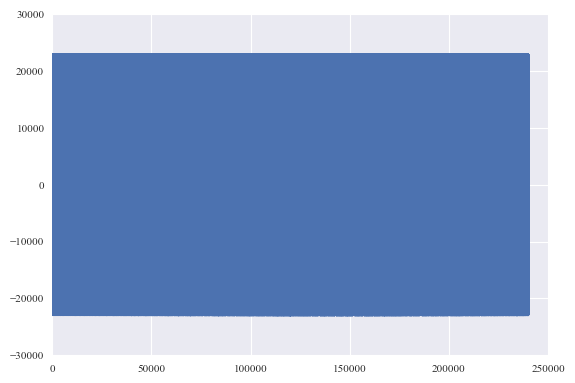

In [20]:
plt.plot(util.float2pcm(y_theory_resamp))